In [112]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Data = pd.read_csv('data.csv',header=None)


In [113]:

class PreprocessData:
    def NomalizeData(Data):
        lenght = len(Data)
        normalizedData = []
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame
    

In [114]:
def abline(slope, intercept ,x , y):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.set_xlim())
    y_vals = intercept + slope * x_vals
    plt.figure()
    plt.plot(x, y ,"o" , markersize=1)
    plt.plot(x_vals, y_vals, '--')

In [115]:
#devide data to test and train 
Dataset = PreprocessData.TestAndTrain(Data , 70)

TrainData = Dataset[0]
TestData = Dataset[1]


In [116]:
#normalize train data 
x= PreprocessData.NomalizeData( pd.Series.tolist( TrainData[0]))
y = PreprocessData.NomalizeData( pd.Series.tolist( TrainData[1]))


In [117]:
#first inits 
theta0 = 1 
theta1 = 0
theta = np.array([0 , 0])
biasX = np.c_[np.ones((len(x) , 1)) , x ]
m = len(x)
n = 1500
alphaRate = 0.04
theta_h = np.zeros((n, 2))
loss_h = np.zeros(n)


Ŷ = -0.7516009598234794 X  +  0.8583022256228988


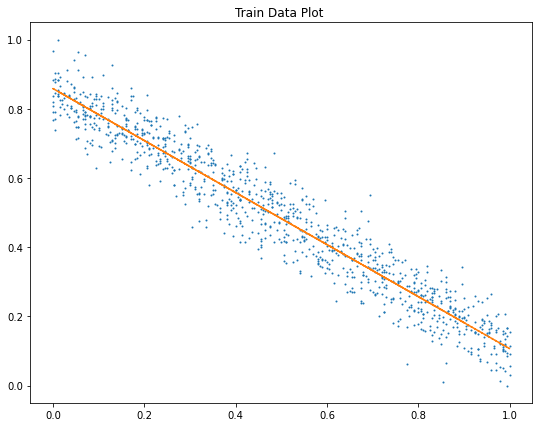

In [129]:
#trainig , Theta1= slope , Theta0 = intercept
plt.figure(figsize=(9,7))
for j in range(n):
    sumation0=0
    sumation1=0
   
   # for i in range(step):
    #    sumation0 += theta0 + theta1*x[i] - y[i]
     #   sumation1 += (theta0 + theta1*x[i] - y[i]) * x[i]
    #theta0 = theta0 - (alphaRate / step) * sumation0
    #theta1 = theta1 - (alphaRate / step) * sumation1
    
    theta = theta- (1/m) * alphaRate*(biasX.T.dot(biasX.dot(theta) - np.array(y) ))

    loss = (1/(2*m)) * np.sum((biasX.dot(theta)-y) ** 2)
    theta_h[j, :] = theta.T
    
    loss_h[j] = loss


predictedY = biasX.dot(theta)
    
plt.plot(x,y,'o',markersize=1)    
plt.plot(x , predictedY , "--")
plt.title("Train Data Plot ")
    

print("Y\u0302"+" = " +str(theta[1])+ " X " + " +  " + str(theta[0]))
   
    

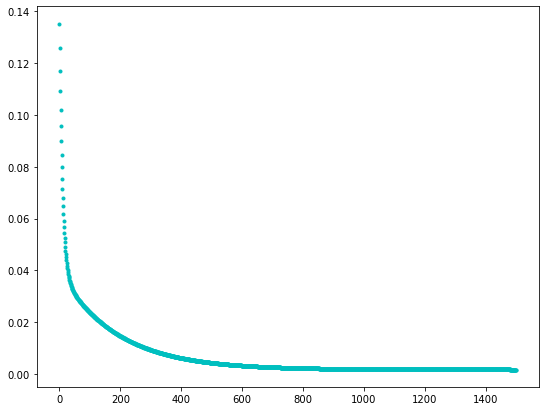

In [119]:
plt.figure(figsize=(9,7))
plt.plot(range(n), loss_h, 'co', markersize = 3)


In [130]:
#normalize train data 
TestX= PreprocessData.NomalizeData( pd.Series.tolist( TestData[0]))
TestY = PreprocessData.NomalizeData( pd.Series.tolist( TestData[1]))
BiasTestX = np.c_[np.ones((len(TestX) , 1)) , TestX]

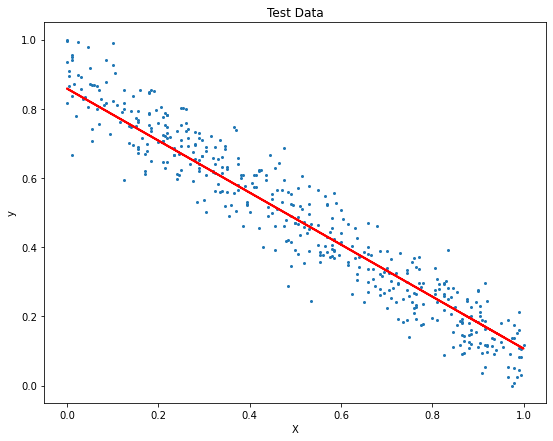

In [132]:
prediction_Y = BiasTestX.dot(theta)

plt.figure(figsize=(9,7))
plt.plot(TestX, TestY, "o", markersize=2)
plt.plot(TestX, prediction_Y, "r-", linewidth=2)
plt.title("Test Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()